https://github.com/jakevdp/PythonDataScienceHandbook

![Python Data Science Handbook](https://www.amazon.com/Python-Data-Science-Handbook-Essential-ebook/dp/B01N2JT3ST)

IPython and Shell Commands

In [1]:
!ls

sample_data


In [2]:
!pwd

/content


In [3]:
!echo "printing from the shell"

printing from the shell


Errors and Debugging

In [4]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [5]:
func2(1)

ZeroDivisionError: ignored

In [6]:
%debug

> <ipython-input-4-586ccabd0db3>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x

ipdb> print(a)
1
ipdb> print(b)
0
ipdb> print(a.shape)
*** AttributeError: 'int' object has no attribute 'shape'
ipdb> print(typeof(a))
*** NameError: name 'typeof' is not defined
ipdb> print(type(a))
<class 'int'>
ipdb> up
> <ipython-input-4-586ccabd0db3>(7)func2()
      3 
      4 def func2(x):
      5     a = x
      6     b = x - 1
----> 7     return func1(a, b)

ipdb> up
> <ipython-input-5-7cb498ea7ed1>(1)<module>()
----> 1 func2(1)

ipdb> print(x)
*** NameError: name 'x' is not defined
ipdb> print(a)
*** NameError: name 'a' is not defined
ipdb> down
> <ipython-input-4-586ccabd0db3>(7)func2()
      3 
      4 def func2(x):
      5     a = x
      6     b = x - 1
----> 7     return func1(a, b)

ipdb> down
> <ipython-input-4-586ccabd0db3>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a 

Profiling and Timing Code

%time: Time the execution of a single statement

%timeit: Time repeated execution of a single statement for more accuracy

%prun: Run code with the profiler

%lprun: Run code with the line-by-line profiler

%memit: Measure the memory use of a single statement

%mprun: Run code with the line-by-line memory profiler



In [7]:
%timeit sum(range(100))

The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 877 ns per loop


In [8]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

1 loop, best of 3: 317 ms per loop


In [9]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

The slowest run took 26.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.26 ms per loop


In [10]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

sorting an unsorted list:
CPU times: user 36.8 ms, sys: 994 µs, total: 37.8 ms
Wall time: 38.3 ms


In [11]:
print("sorting an already sorted list:")
%time L.sort()

sorting an already sorted list:
CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 2.87 ms


In [12]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 390 ms, sys: 17 µs, total: 390 ms
Wall time: 390 ms


In [13]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j + i for j in range(N)]
        total += sum(L)
    return total

In [14]:
!pip install line_profiler

     |████████████████████████████████| 71kB 2.9MB/s 


In [15]:
%load_ext line_profiler

In [16]:
%lprun -f sum_of_lists sum_of_lists(5000)

In [17]:
!pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp36-none-any.whl size=28992 sha256=bae9e674d275f0d9037e225ad5a4a5db2bc849a38bfd71caa9ec66cebb9025e1
  Stored in directory: /root/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler


In [18]:
%load_ext memory_profiler

In [19]:
%memit sum_of_lists(1000000)

peak memory: 188.52 MiB, increment: 74.46 MiB


Introduction to NumPy

In [20]:
import numpy
numpy.__version__

'1.18.5'

In [21]:
import numpy as np

In [22]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [24]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [25]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [26]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [27]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.02939154, 0.71328002, 0.71260812],
       [0.04143963, 0.94688203, 0.98738037],
       [0.89248753, 0.94546899, 0.72773033]])

In [28]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 0.41605175, -0.70650389, -0.12287349],
       [-1.34346321,  1.36634218, -1.55103753],
       [-1.7089351 , -0.75336828, -0.18082598]])

In [29]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[8, 7, 1],
       [8, 8, 8],
       [1, 3, 0]])

In [30]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

The Basics of NumPy Arrays

In [32]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [33]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [34]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [35]:
x2[:2, :3]  # two rows, three columns

array([[3, 5, 2],
       [7, 6, 8]])

In [36]:
x2[:3, ::2]  # all rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

In [37]:
x2[::-1, ::-1]

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

In [38]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [39]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


In [40]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [41]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [42]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


In [43]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [44]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [45]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [46]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [47]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [48]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [49]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Fancy Indexing

In [50]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [51]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [52]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [53]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [54]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [55]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [56]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Visualization with Matplotlib

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [58]:
%matplotlib inline

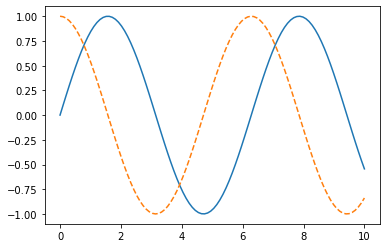

In [59]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.show()

In [60]:
fig.savefig('my_figure.png')

In [61]:
!ls

my_figure.png  sample_data


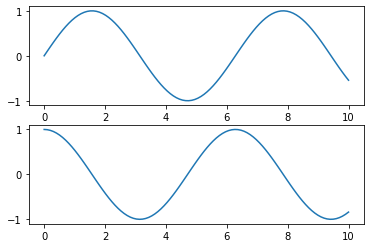

In [62]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

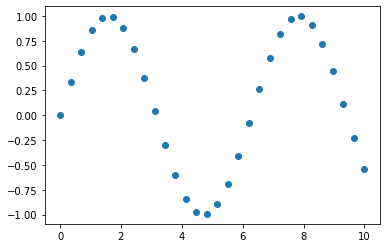

In [63]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, marker='o');

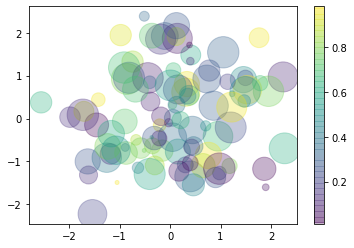

In [64]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Visualizing Errors

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

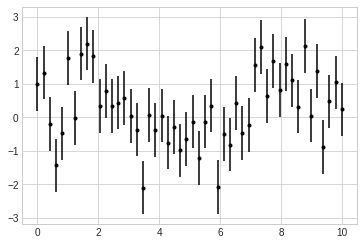

In [66]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

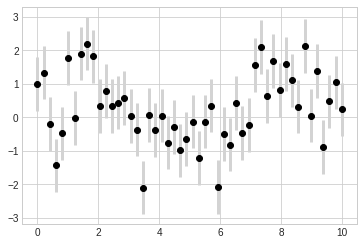

In [67]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [69]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [70]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

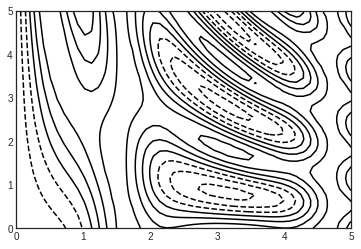

In [71]:
plt.contour(X, Y, Z, colors='black');

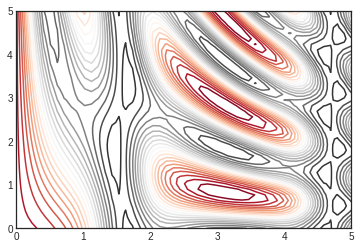

In [72]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

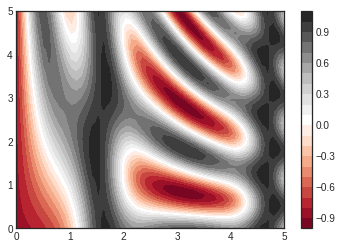

In [73]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

(0.0, 5.0, 0.0, 5.0)

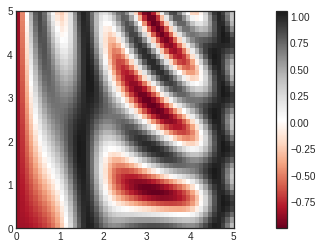

In [74]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis('image')

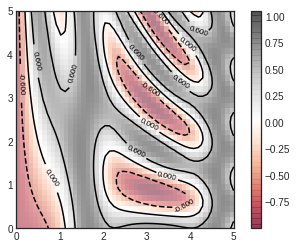

In [75]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();